# TKT4108 Structural dynamics 2

## Exercise 6

**Main topics:** Signal processing and system identification

**References:** Jupyter notebook examples 

**Hint**: Take a look at the examples posted on Github

### Problem 1

<img src="Fig_6_1.svg">

In this problem we will consider the same share frame as in problem set 5. Use the code below to obtain accelaration time series

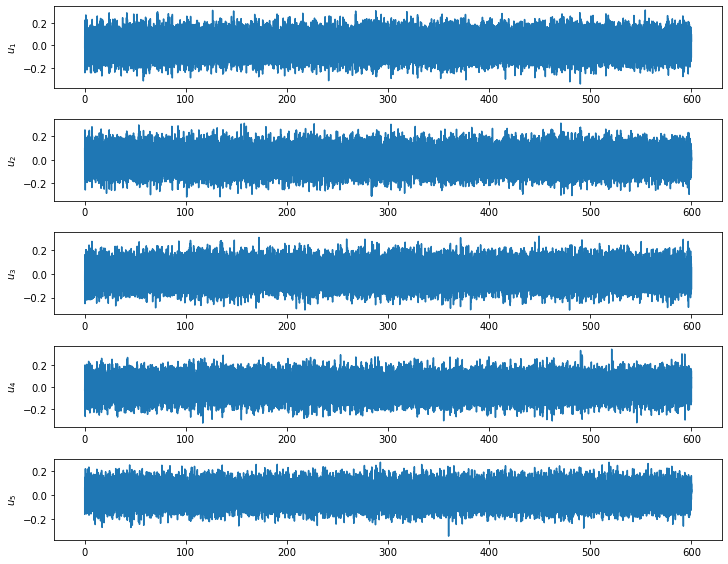

In [23]:
import numpy as np
from scipy import linalg as spla
from time_integration import *
from matplotlib import pyplot as plt

MM = np.eye(5) *1000
KK = np.zeros((6,6))
EI = 2.1e11*3.34e-6
L = 3
ks = 2 *12*EI/L**3

for k in range(5):
    KK[k+1,k+1] = KK[k+1,k+1] + ks
    KK[k,k] = KK[k,k] + ks
    KK[k+1,k] = KK[k+1,k] -ks
    KK[k,k+1] = KK[k,k+1] -ks

KK = KK[1::,1::] # Introduce boundary conditions

lam, vec = spla.eig(KK,MM)

indx = np.argsort(lam)
lam = lam[indx]


vec = vec[:,indx]

f = np.real(lam**0.5)/2/np.pi

MM_modal = vec.T @ MM @ vec

CC_modal = 2*np.eye(5)*5/100*MM_modal*np.diag(f)*2*np.pi

CC = vec @ CC_modal @ vec.T

t = np.arange(0,600,0.01)

x=np.random.normal(0,50, size=(5,len(t))) # White noise loading

u0 = np.zeros((5,1))
udot0 = np.zeros((5,1))

gamma = 1/2
beta = 1/4

h = t[1] - t[0]

y, _, y2dot = linear_newmark_krenk(MM,CC,KK,x,u0,udot0,h,gamma,beta)

fix, axs = plt.subplots(5,1,figsize=(10,8))

plt.tight_layout()

for k in range(5):
    axs[k].plot(t,y2dot[k,:])
    axs[k].set_ylabel("$u_" + str(k+1) + "$")


a) Solve the eigenproblem and obtain undamped natural frequencies and modes

b) Use simulated time series to identify frequenceis and modes using the basic frequency domain method (peak picking)

b) Use simulated time series to identify frequenceis and modes using frequency domain decomposition (FDD)
